c:\Users\Matias Davila\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


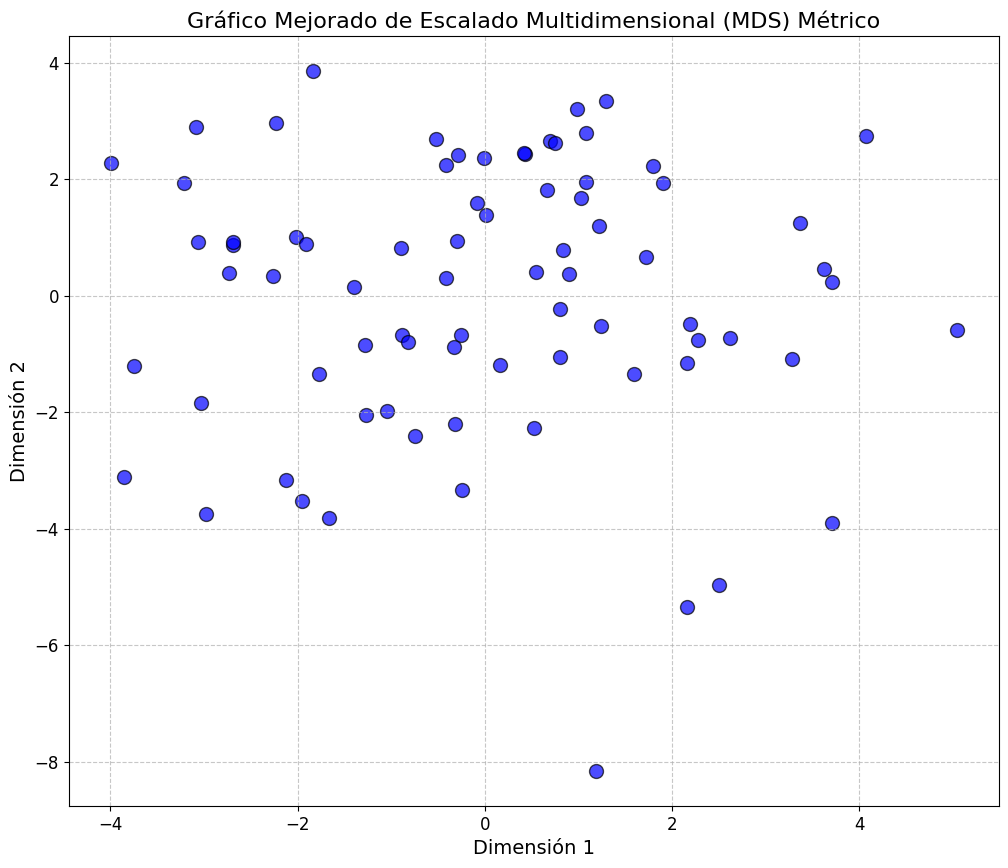

c:\Users\Matias Davila\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


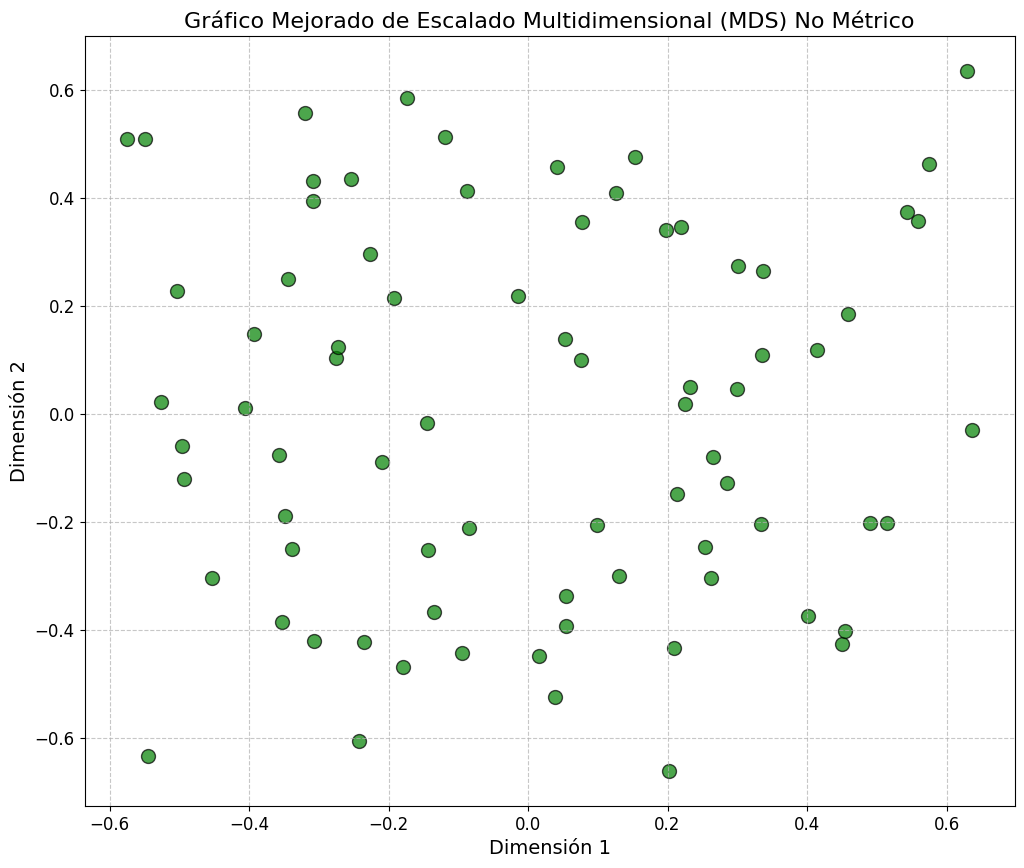

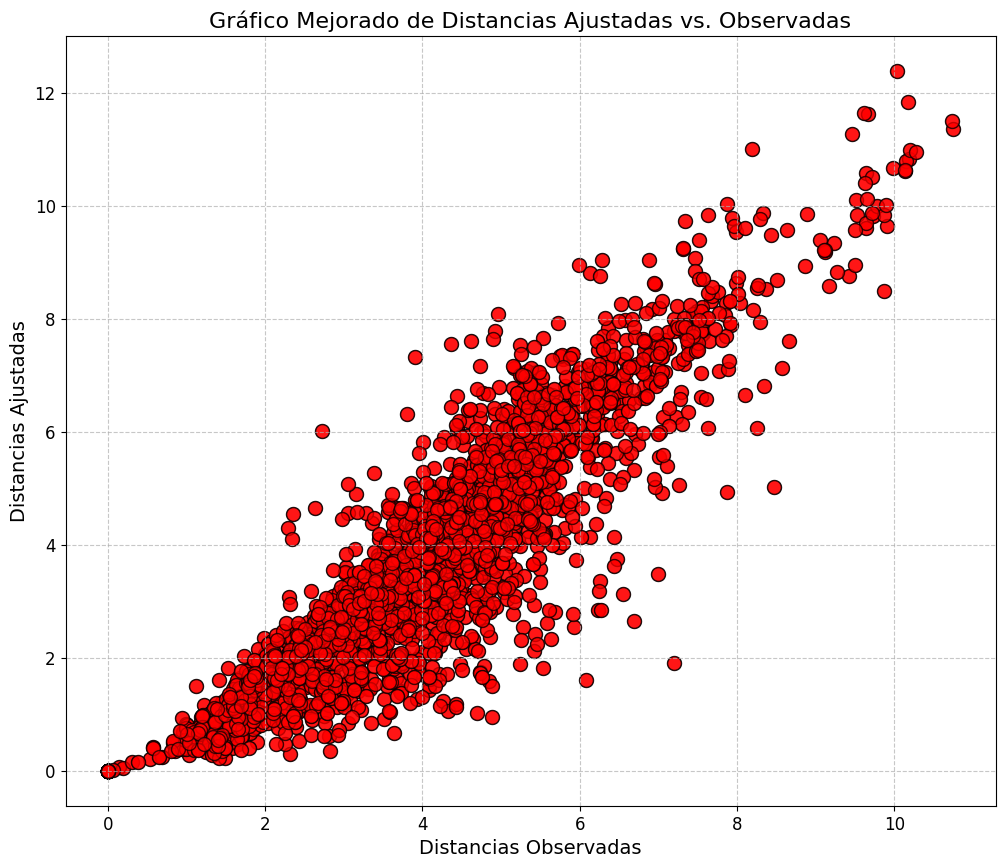

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ajusta este path para que coincida con la ubicación de tu archivo
data_path = 'C:/Users/Matias Davila/OneDrive - DISTRIBUIDORA Y COMERCIALIZADORA OPEN/Documentos/Matias/Analisis multivariante/Semana2/cereal.csv'
cereal_data = pd.read_csv(data_path)

# Selecciona las variables numéricas para el análisis
variables_analisis = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'rating']
cereal_numeric = cereal_data[variables_analisis]

# Estandariza las variables
scaler = StandardScaler()
cereal_scaled = scaler.fit_transform(cereal_numeric)

import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Aplica MDS Métrico
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=0)
cereal_mds = mds.fit_transform(cereal_scaled)

# Gráfico de MDS Métrico mejorado
plt.figure(figsize=(12, 10))
plt.scatter(cereal_mds[:, 0], cereal_mds[:, 1], c='blue', edgecolor='black', alpha=0.7, s=100)
plt.title('Gráfico Mejorado de Escalado Multidimensional (MDS) Métrico', fontsize=16)
plt.xlabel('Dimensión 1', fontsize=14)
plt.ylabel('Dimensión 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

from sklearn.metrics.pairwise import euclidean_distances

# Aplica MDS No Métrico
mds_non_metric = MDS(n_components=2, metric=False, dissimilarity='precomputed', random_state=0)
distance_matrix = euclidean_distances(cereal_scaled)
cereal_mds_nm = mds_non_metric.fit_transform(distance_matrix)

# Gráfico de MDS No Métrico mejorado
plt.figure(figsize=(12, 10))
plt.scatter(cereal_mds_nm[:, 0], cereal_mds_nm[:, 1], c='green', edgecolor='black', alpha=0.7, s=100)
plt.title('Gráfico Mejorado de Escalado Multidimensional (MDS) No Métrico', fontsize=16)
plt.xlabel('Dimensión 1', fontsize=14)
plt.ylabel('Dimensión 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Gráfico de Distancias Ajustadas vs. Observadas mejorado
adjusted_distances = euclidean_distances(cereal_mds)
observed_distances = euclidean_distances(cereal_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(observed_distances.flatten(), adjusted_distances.flatten(), c='red', edgecolor='black', alpha=0.7, s=100)
plt.title('Gráfico Mejorado de Distancias Ajustadas vs. Observadas', fontsize=16)
plt.xlabel('Distancias Observadas', fontsize=14)
plt.ylabel('Distancias Ajustadas', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


